# Churn Predictor

In [14]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /Users/samgrant/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1


In [15]:
import pandas as pd

full_path = path + '/WA_Fn-UseC_-Telco-Customer-Churn.csv'

df = pd.read_csv(full_path)

In [16]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Initial Analysis

- 'customerID' not required for predicting churn.
- Could turn churn into binary.

In [18]:
df.drop(columns=['customerID'])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [19]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [20]:
df['TotalCharges'].isna().sum()

np.int64(11)

In [21]:
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='median')
df['TotalCharges'] = imputer.fit_transform(df[['TotalCharges']])

## New Features

- Can place 'tenure' into bins
- Move services into one textual category with each service as an element

In [22]:
df['TenureBin'] = pd.cut(df['tenure'], bins=[0,12,24,48,72], labels=['0-12', '13-24', '25-48', '48-72'])
services = ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df['HasMultipleServices'] = df[services].apply(lambda row: sum(row=='Yes'), axis=1)
df['MonthlyChargesPerService'] = df['MonthlyCharges'] / (df['HasMultipleServices'] + 1)
df["SeniorFlag"] = df["SeniorCitizen"].astype(bool)

In [23]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

X = df.drop(columns=['Churn'], axis=1)
y = df['Churn'].map({'Yes':1, 'No':0})

In [24]:
numeric_features = ["tenure","MonthlyCharges","TotalCharges","HasMultipleServices","MonthlyChargesPerService"]
categorical_features = ["gender","Partner","Dependents","PhoneService","MultipleLines",
                        "InternetService","OnlineSecurity","OnlineBackup","DeviceProtection",
                        "TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling",
                        "PaymentMethod","TenureBin"]

numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

In [37]:
import plotly.express as px
from sklearn.decomposition import PCA

X_scaled = StandardScaler().fit_transform(df[numeric_features])
X_pca = PCA(n_components=2).fit_transform(X_scaled)

fig = px.scatter(df, x=X_pca[:, 0], y=X_pca[:, 1], color="Churn", opacity=0.8)
fig.show()

<Axes: >

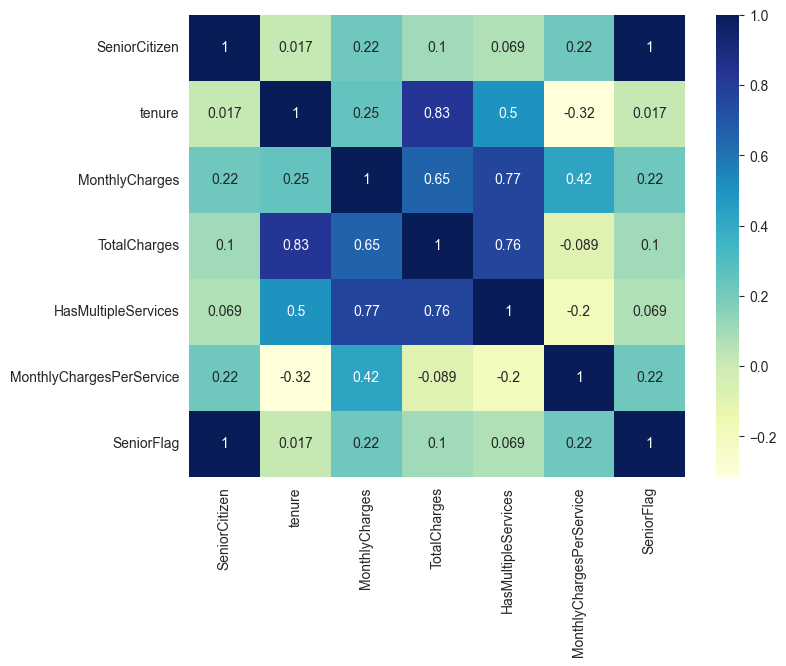

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="YlGnBu")

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
}

cross_val_results = {}

for name, model in models.items():
    pipe = Pipeline([("preprocess", preprocessor), ("model", model)])
    scores = cross_val_score(pipe, X, y, cv=5, scoring="accuracy")
    print(f"{name}: {scores.mean():.3f}, STD: {scores.std():.3f}")
    cross_val_results[name] = scores

Logistic Regression: 0.805, STD: 0.008
Random Forest: 0.786, STD: 0.017
SVM: 0.800, STD: 0.011


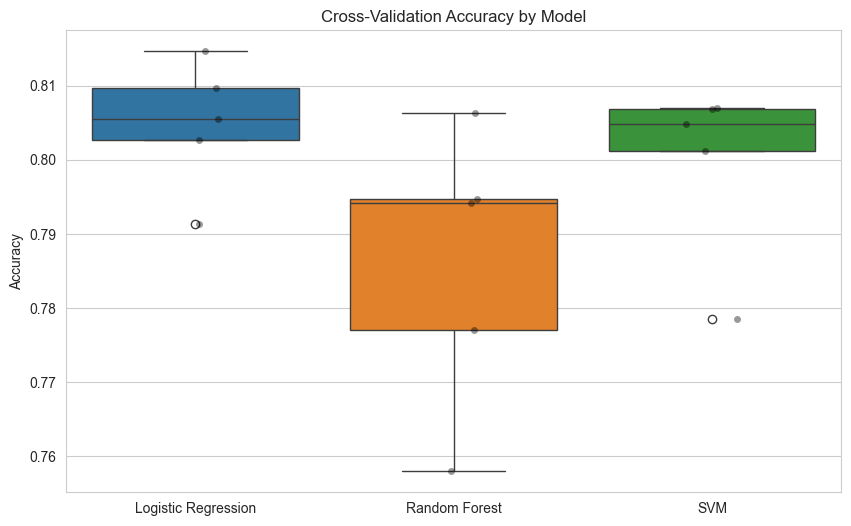

In [39]:
# Convert to DataFrame
cv_df = pd.DataFrame(cross_val_results)

# Boxplot to show score distribution
plt.figure(figsize=(10,6))
sns.boxplot(data=cv_df)
sns.stripplot(data=cv_df, color="black", alpha=0.4)
plt.title("Cross-Validation Accuracy by Model")
plt.ylabel("Accuracy")
plt.show()